In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [19]:
dataset=pd.read_csv("Sunspots.csv")
dataset.drop(columns="Unnamed: 0",inplace=True)
dataset

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3247,2019-08-31,0.5
3248,2019-09-30,1.1
3249,2019-10-31,0.4
3250,2019-11-30,0.5


In [20]:
dataset["Date"]=pd.to_datetime(dataset["Date"],format="%Y-%m-%d")
dataset.set_index(dataset["Date"],inplace=True)
dataset.drop(columns="Date",inplace=True)
dataset

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2019-08-31,0.5
2019-09-30,1.1
2019-10-31,0.4


In [29]:
train_data,valid_data=dataset.loc[:"2018-12-31"],dataset.loc["2019-01-01":]

In [30]:
train_data

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2018-08-31,8.7
2018-09-30,3.3
2018-10-31,4.9


In [31]:
valid_data

,Monthly Mean Total Sunspot Number
Date,
2019-01-31,7.7
2019-02-28,0.8
2019-03-31,9.4
2019-04-30,9.1
2019-05-31,9.9
2019-06-30,1.2
2019-07-31,0.9
2019-08-31,0.5
2019-09-30,1.1


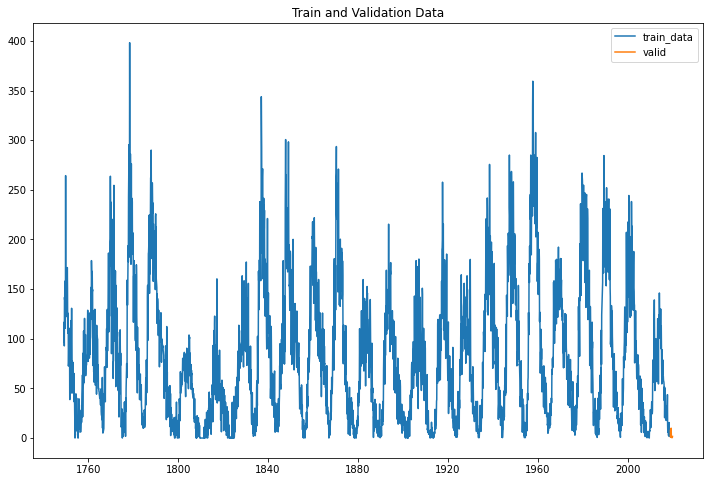

In [33]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='train_data')
plt.plot(valid_data.index,valid_data, label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

## Stationarity Test

In [34]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [35]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [37]:
adf_test(train_data)

Results of Dickey-Fuller Test:
Test Statistic                -1.048925e+01
p-value                        1.158517e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.211000e+03
Critical Value (1%)           -3.432388e+00
Critical Value (5%)           -2.862441e+00
Critical Value (10%)          -2.567249e+00
dtype: float64


In [38]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [39]:
kpss_test(train_data)

Results of KPSS Test:
Test Statistic            0.138273
p-value                   0.100000
Lags Used                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


**The Time Series is Stationary**